In [2]:
import sys
sys.path.append("../Utils")
import numpy as np
import glob
import os
from Data_preprocessing import get_box_coords
from Data_preprocessing import load_model
root="/tf/Data-Guillermo"

import matplotlib.pyplot as plt
import Distances
from Distances import MMD,radial_funtion,guassian_norm_funtion
import numpy as np
from plot_utils import *

Using TensorFlow backend.


In [3]:
def add_label(violin, label,labels):
    color = violin["bodies"][0].get_facecolor().flatten()
    labels.append((mpatches.Patch(color=color), label))

def plot_multiple_models(distances_dictionaries,figure,distance_name):
    
    plt.title(distance_name)
    
    labels = []
    for j,(distances_dictionary,name) in enumerate(zip(distances_dictionaries,["MT2PA","PA2MA"])):
        train_data=distances_dictionary["Train"]
        validation_data=distances_dictionary["Test"]
        
        
        for i,model_name in enumerate(distances_dictionary["Train"].keys()):
            i=i*2+10*j
            print(i,model_name)
            plt.scatter(y=train_data[model_name]["shared"] ,
                        x=i*np.ones(train_data[model_name]["shared"][0].shape)-0.5,alpha=0.1,s=50.0,color="r",
                        )
            plt.scatter(y=validation_data[model_name]["shared"] ,
                        x=i*np.ones(validation_data[model_name]["shared"][0].shape)-0.25,alpha=0.1,s=50.0,color="b",
                        label="test_shared_space")
            plt.scatter(y=train_data[model_name]["privated"] ,
                        x=0.25+i*np.ones(train_data[model_name]["privated"][0].shape),alpha=0.1,s=50.0,color="r",
                        label="training_privated_space")
            plt.scatter(y=validation_data[model_name]["privated"] ,
                        x=0.5+i*np.ones(validation_data[model_name]["privated"][0].shape),alpha=0.1,s=50.0,color="b",
                       label="test_privated_space")
        
        ranges=(10*j,10*(j+1),2)
        vts=plt.violinplot(
            [distances_dictionary['Train'][k]["shared"][0] for k in distances_dictionary['Train'].keys()],
            positions=np.array(list(range(*ranges)))-0.5,showmeans=True)
        add_label(vts,"training_shared_space_"+name,labels)
        vvs=plt.violinplot(
            [distances_dictionary['Test'][k]["shared"][0] for k in distances_dictionary['Test'].keys()],
            positions=np.array(list(range(*ranges)))-0.25,showmeans=True)
        add_label(vvs,"test_shared_space_"+name,labels)
        vtp=plt.violinplot(
            [distances_dictionary['Train'][k]["privated"][0] for k in distances_dictionary['Train'].keys()],
            positions=np.array(list(range(*ranges)))+0.25,showmeans=True)
        add_label(vtp,"training_privated_space_"+name,labels)
        vvp=plt.violinplot(
            [distances_dictionary['Test'][k]["privated"][0] for k in distances_dictionary['Test'].keys()],
            positions=np.array(list(range(*ranges)))+0.5,showmeans=True)
        add_label(vvp,"test_privated_space_"+name,labels)

    plt.ylabel("Discrepancy measure")
    plt.xlabel("Datasets and experiment iterations")
    plt.grid(visible=True)
    plt.legend(*zip(*labels), loc=2)
    plt.xticks(
        list(range(0,20,2)),
        list(distances_dictionaries[0]["Train"].keys())+list(distances_dictionaries[1]["Train"].keys()))
    return plt

In [4]:
#from Distances import KL_divergence,general_normal_distribution,Univariate_Normal

from Distances import Jensen_Shanon_divergence,general_normal_distribution,Univariate_Normal,median_gaussian
JSD=Jensen_Shanon_divergence(
    Distribution_embedding=general_normal_distribution,
    Distance_function=Univariate_Normal,
    Mixture_distribution_method=median_gaussian
)

dists_ex=[]
dists_sh=[]

dist_dic={
    "Train":{},
    "Test":{}
}

base_model="MT2PA"
for data_subset in ["Test","Train"]:
    print(data_subset)
    for run in range(0,5):
        
        model='{}_run_{}'.format(base_model,run)
        print('{}_run_{}'.format(base_model,run))
    
        dist_ex=np.array(JSD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_ex','MT','PA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_ex.append(dist_ex)
        print("private done")
        

        dist_sh=np.array(JSD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_sh','MT','PA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_sh.append(dist_sh)
        print("shared done")
        
        dist_dic[data_subset][model]={
        "shared":dists_sh,
        "privated":dists_ex
    }
        dists_ex=[]
        dists_sh=[]
    

np.save(os.path.join(root,"Latent_space",base_model+"_JSD_general_normal_distribution_reduction"),dist_dic)

#plt.violinplot([dist_dic['Train'][k]["shared"][0] for k in dist_dic['Train'].keys()])
plot_distances(dist_dic)

Test
MT2PA_run_0
private done
shared done
MT2PA_run_1
private done
shared done
MT2PA_run_2
private done
shared done
MT2PA_run_3
private done
shared done
MT2PA_run_4
private done
shared done
Train
MT2PA_run_0
private done
shared done
MT2PA_run_1
private done
shared done
MT2PA_run_2
private done
shared done
MT2PA_run_3
private done
shared done
MT2PA_run_4
private done
shared done


NameError: name 'plot_distances' is not defined

0 MT2PA_run_0
2 MT2PA_run_1
4 MT2PA_run_2
6 MT2PA_run_3
8 MT2PA_run_4


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

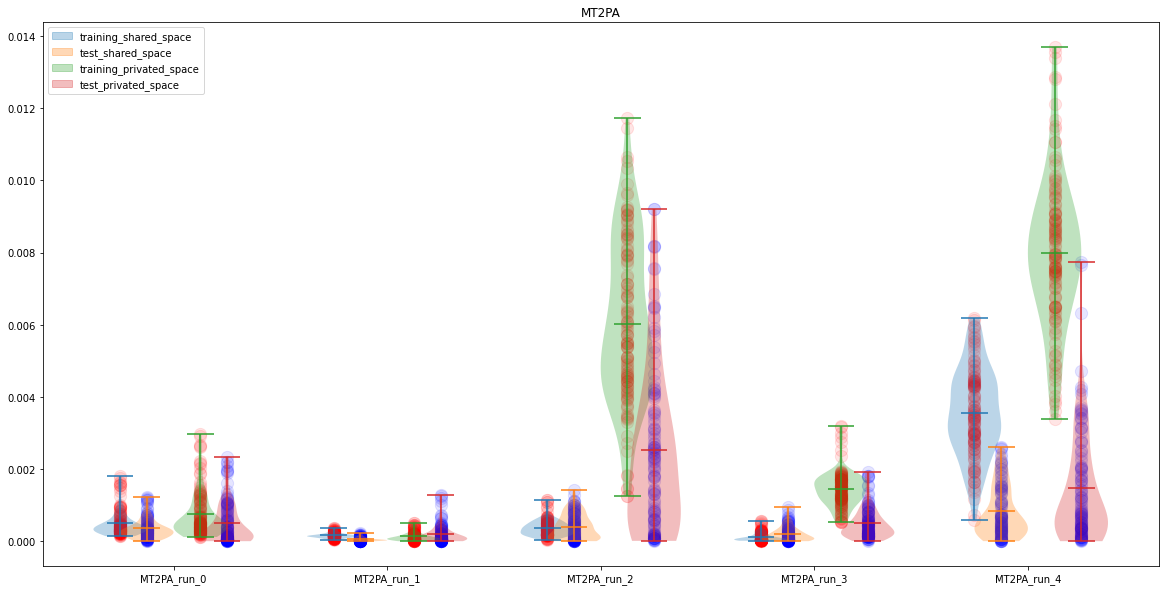

In [4]:
plot_distances(
    np.load(
        os.path.join(root,"Latent_space","MT2PA"+"_JSD_general_normal_distribution_reduction.npy"),
        allow_pickle=True).tolist())

PA2MA_run_0
PA2MA_run_1
PA2MA_run_2
PA2MA_run_3
PA2MA_run_4
PA2MA_run_0
PA2MA_run_1
PA2MA_run_2
PA2MA_run_3
PA2MA_run_4
0 PA2MA_run_0
2 PA2MA_run_1
4 PA2MA_run_2
6 PA2MA_run_3
8 PA2MA_run_4


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

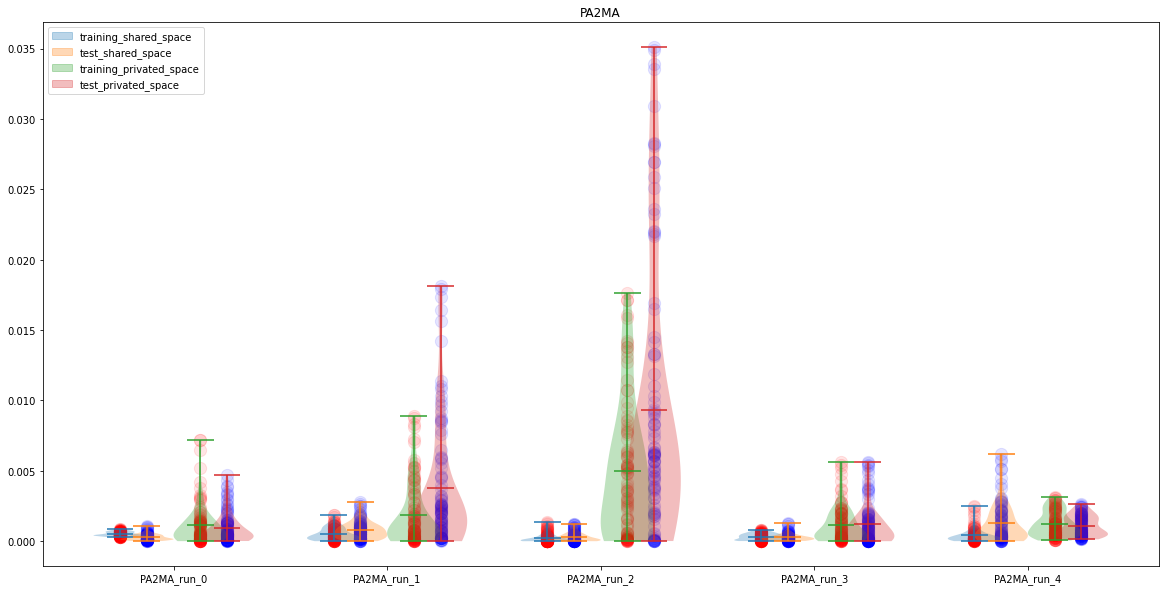

In [3]:
from Distances import Jensen_Shanon_divergence,general_normal_distribution,Univariate_Normal,median_gaussian
JSD=Jensen_Shanon_divergence(
    Distribution_embedding=general_normal_distribution,
    Distance_function=Univariate_Normal,
    Mixture_distribution_method=median_gaussian
)
dists_ex=[]
dists_sh=[]

dist_dic={
    "Train":{},
    "Test":{}
}

base_model="PA2MA"
for data_subset in ["Test","Train"]:
    for run in range(0,5):
        
        model='{}_run_{}'.format(base_model,run)
        print('{}_run_{}'.format(base_model,run))
    
        dist_ex=np.array(JSD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_ex','PA','MA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_ex.append(dist_ex)
        

        dist_sh=np.array(JSD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_sh','PA','MA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_sh.append(dist_sh)
        
        dist_dic[data_subset][model]={
        "shared":dists_sh,
        "privated":dists_ex
    }
        dists_ex=[]
        dists_sh=[]
    

np.save(os.path.join(root,"Latent_space",base_model+"_JSD_general_normal_distribution_reduction"),dist_dic)

#plt.violinplot([dist_dic['Train'][k]["shared"][0] for k in dist_dic['Train'].keys()])
plot_distances(dist_dic)

0 PA2MA_run_0
2 PA2MA_run_1
4 PA2MA_run_2
6 PA2MA_run_3
8 PA2MA_run_4
10 MT2PA_run_0
12 MT2PA_run_1
14 MT2PA_run_2
16 MT2PA_run_3
18 MT2PA_run_4


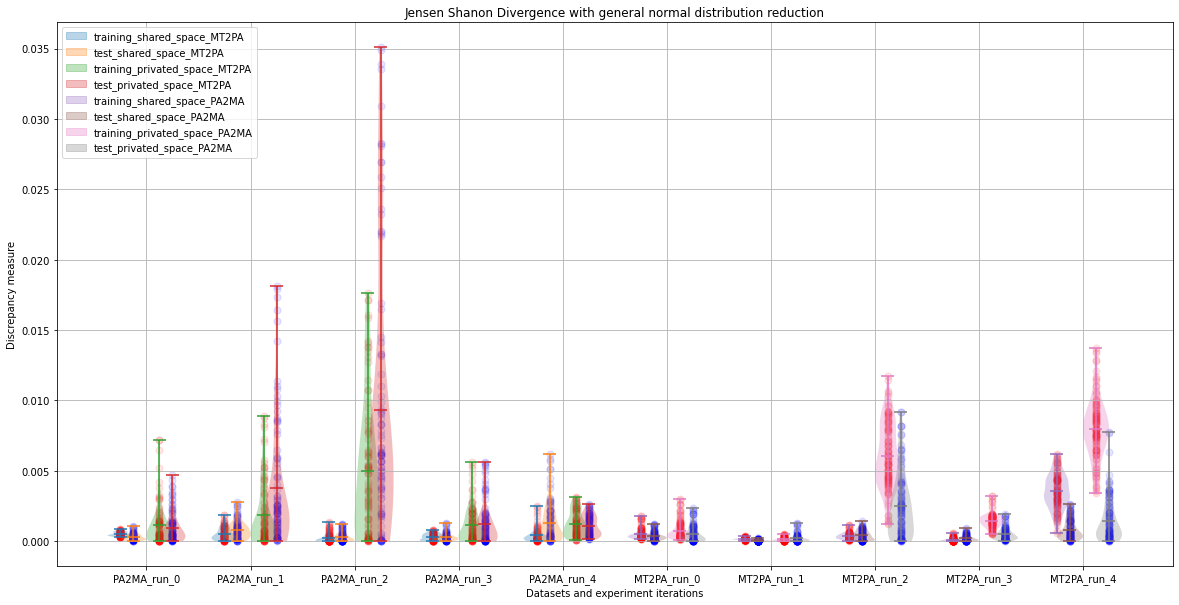

In [6]:
plot_multiple_models([
    np.load(os.path.join(root,"Latent_space","PA2MA"+"_JSD_general_normal_distribution_reduction.npy"),allow_pickle=True).tolist(),
    np.load(os.path.join(root,"Latent_space","MT2PA"+"_JSD_general_normal_distribution_reduction.npy"),allow_pickle=True).tolist()
],
    figure=plt.figure(figsize=(20,10)),
    distance_name="Jensen Shanon Divergence with general normal distribution reduction").savefig("JSD_general_normal_distribution_reduction.png")

Test
MT2PA_run_0
MT2PA_run_1
MT2PA_run_2
MT2PA_run_3
MT2PA_run_4
Train
MT2PA_run_0
MT2PA_run_1
MT2PA_run_2
MT2PA_run_3
MT2PA_run_4
0 MT2PA_run_0
2 MT2PA_run_1
4 MT2PA_run_2
6 MT2PA_run_3
8 MT2PA_run_4


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

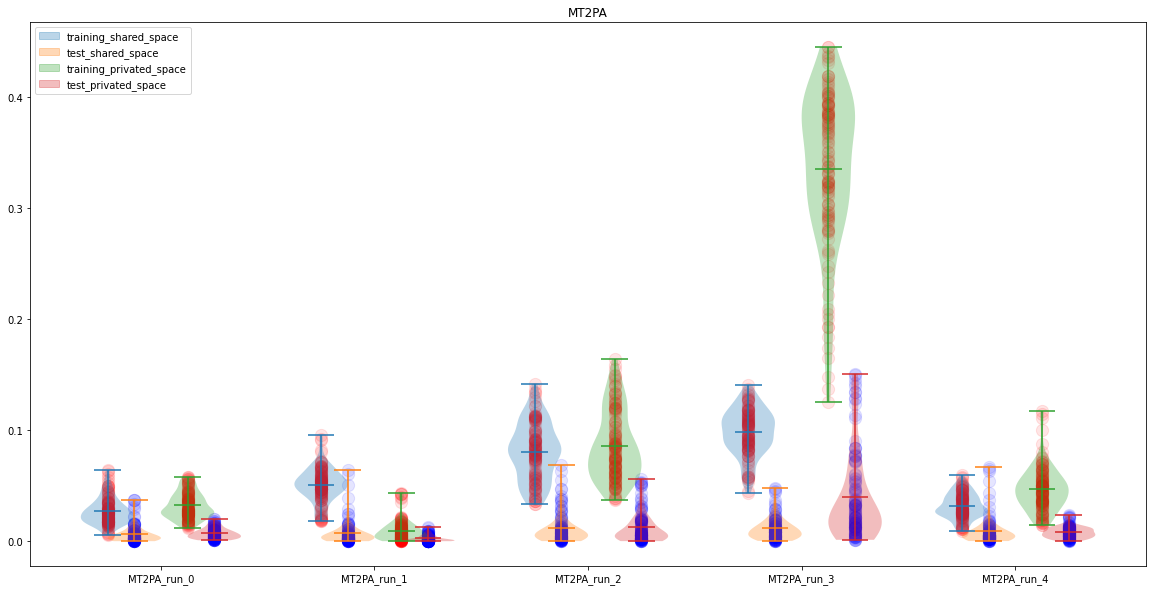

In [5]:
from Distances import KL_divergence,moment_reduction,Moment_based_Multivariate_Normal,batch_normal_reduction
image_mean_red=(lambda P1: tuple(
    map(lambda img:moment_reduction(img,i=1,j=1),batch_normal_reduction(P1))
))

JSD=Jensen_Shanon_divergence(
    Distribution_embedding=image_mean_red,
    Distance_function=Moment_based_Multivariate_Normal,
    Mixture_distribution_method=median_gaussian
)

dists_ex=[]
dists_sh=[]

dist_dic={
    "Train":{},
    "Test":{}
}

base_model="MT2PA"
for data_subset in ["Test","Train"]:
    print(data_subset)
    for run in range(0,5):
        
        model='{}_run_{}'.format(base_model,run)
        print('{}_run_{}'.format(base_model,run))
    
        dist_ex=np.array(JSD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_ex','MT','PA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_ex.append(dist_ex)

        dist_sh=np.array(JSD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_sh','MT','PA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_sh.append(dist_sh)
        
        dist_dic[data_subset][model]={
        "shared":dists_sh,
        "privated":dists_ex
    }
        dists_ex=[]
        dists_sh=[]
    

np.save(os.path.join(root,"Latent_space",base_model+"_JSD_general_moment_11_based_reduction"),dist_dic)

#plt.violinplot([dist_dic['Train'][k]["shared"][0] for k in dist_dic['Train'].keys()])
plot_distances(dist_dic)

Test
PA2MA_run_0
PA2MA_run_1
PA2MA_run_2
PA2MA_run_3
PA2MA_run_4
Train
PA2MA_run_0
PA2MA_run_1
PA2MA_run_2
PA2MA_run_3
PA2MA_run_4
0 PA2MA_run_0
2 PA2MA_run_1
4 PA2MA_run_2
6 PA2MA_run_3
8 PA2MA_run_4


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

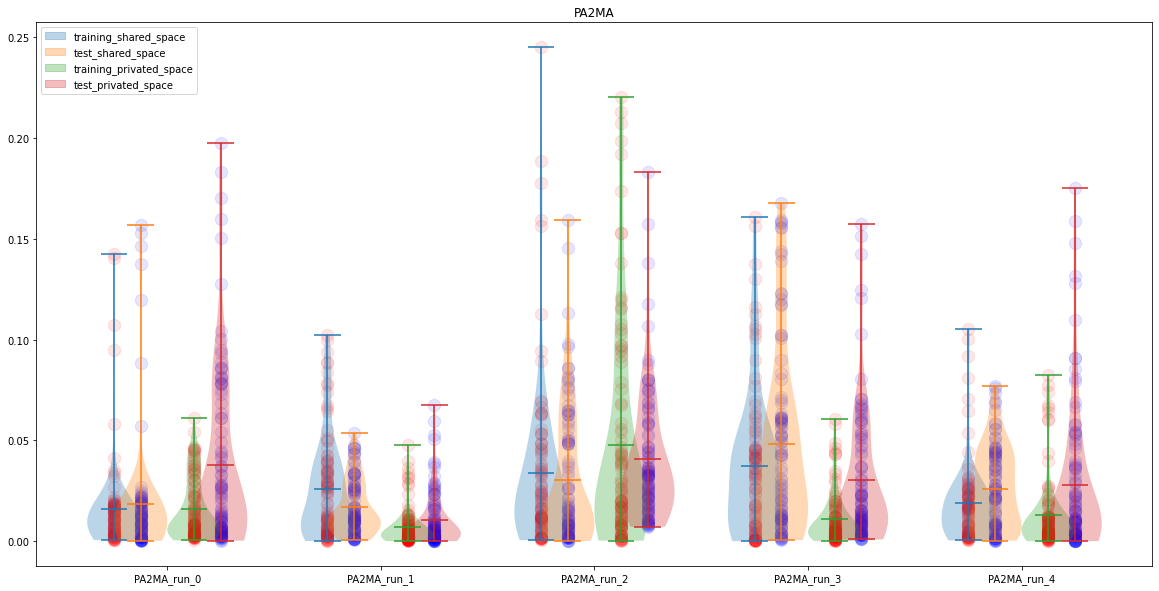

In [6]:
from Distances import KL_divergence,moment_reduction,Moment_based_Multivariate_Normal,batch_normal_reduction
image_mean_red=(lambda P1: tuple(
    map(lambda img:moment_reduction(img,i=1,j=1),batch_normal_reduction(P1))
))
KLD=KL_divergence(Distribution_embedding=image_mean_red,
              Distance_function=Moment_based_Multivariate_Normal
             )

dists_ex=[]
dists_sh=[]

dist_dic={
    "Train":{},
    "Test":{}
}

base_model="PA2MA"
for data_subset in ["Test","Train"]:
    print(data_subset)
    for run in range(0,5):
        
        model='{}_run_{}'.format(base_model,run)
        print('{}_run_{}'.format(base_model,run))
    
        dist_ex=np.array(KLD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_ex','PA','MA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_ex.append(dist_ex)
        
        dist_sh=np.array(KLD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_sh','PA','MA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_sh.append(dist_sh)
        
        dist_dic[data_subset][model]={
        "shared":dists_sh,
        "privated":dists_ex
    }
        dists_ex=[]
        dists_sh=[]
    

np.save(os.path.join(root,"Latent_space",base_model+"_JSD_general_moment_11_based_reduction"),dist_dic)

#plt.violinplot([dist_dic['Train'][k]["shared"][0] for k in dist_dic['Train'].keys()])
plot_distances(dist_dic)

0 PA2MA_run_0
2 PA2MA_run_1
4 PA2MA_run_2
6 PA2MA_run_3
8 PA2MA_run_4
10 MT2PA_run_0
12 MT2PA_run_1
14 MT2PA_run_2
16 MT2PA_run_3
18 MT2PA_run_4


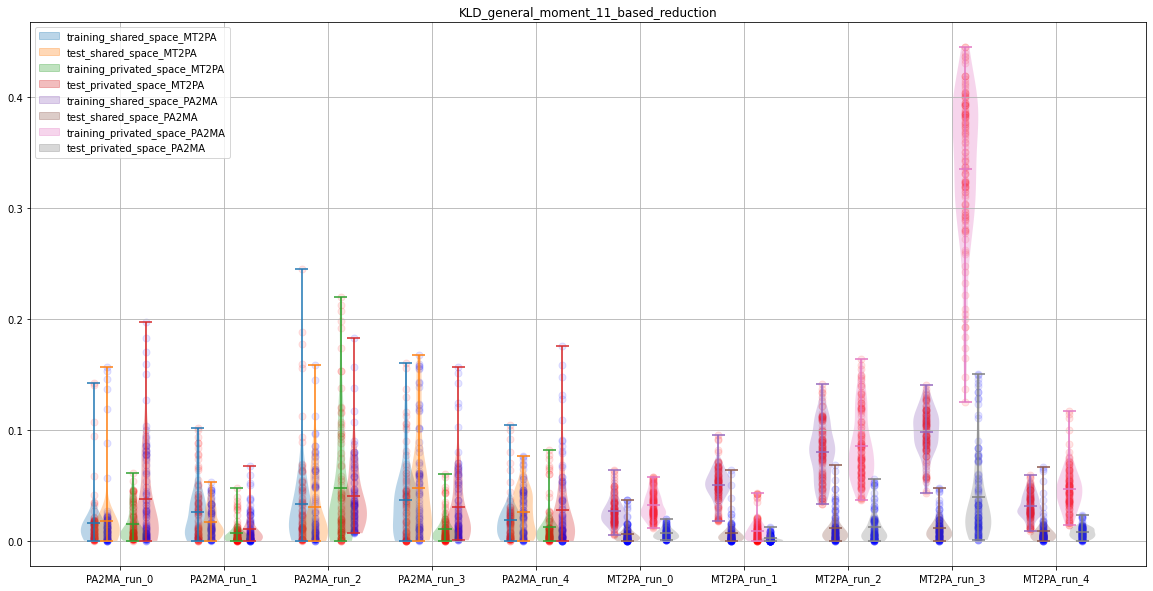

In [20]:
plot_multiple_models([
    np.load(os.path.join(root,"Latent_space","PA2MA"+"_JSD_general_moment_11_based_reduction.npy"),allow_pickle=True).tolist(),
    np.load(os.path.join(root,"Latent_space","MT2PA"+"_JSD_general_moment_11_based_reduction.npy"),allow_pickle=True).tolist()
],
    figure=plt.figure(figsize=(20,10)),
    distance_name="KLD_general_moment_11_based_reduction").savefig("KLD_general_moment_11_based_reduction.png")

Test
MT2PA_run_0
MT2PA_run_1
MT2PA_run_2
MT2PA_run_3
MT2PA_run_4
Train
MT2PA_run_0
MT2PA_run_1
MT2PA_run_2
MT2PA_run_3
MT2PA_run_4
0 MT2PA_run_0
2 MT2PA_run_1
4 MT2PA_run_2
6 MT2PA_run_3
8 MT2PA_run_4


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

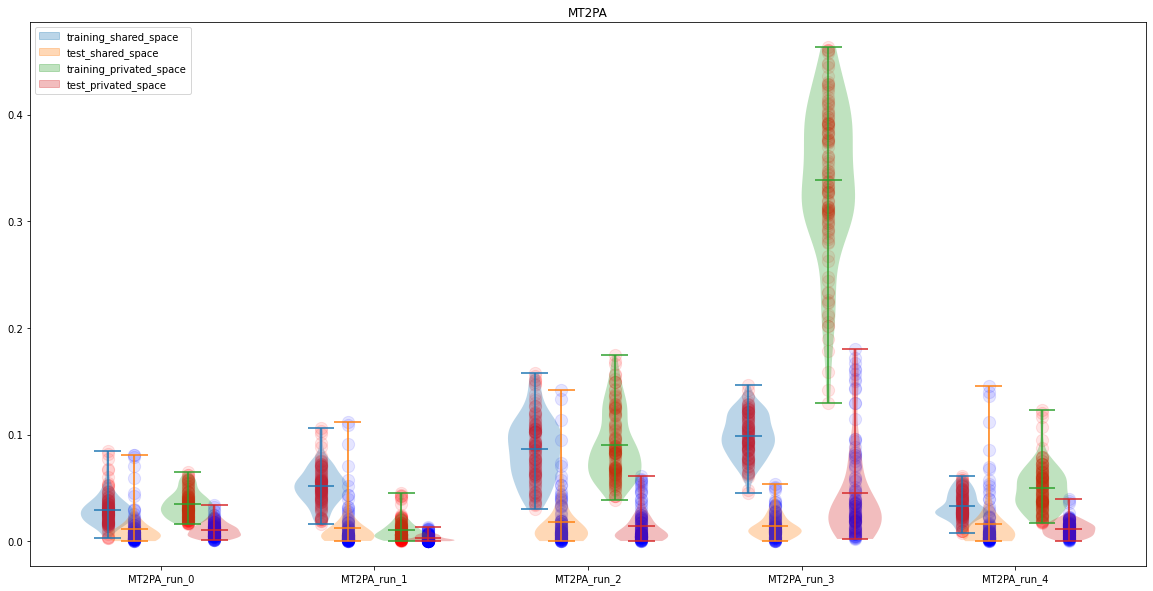

In [12]:
from Distances import KL_divergence,moment_reduction,Moment_based_Multivariate_Normal,batch_normal_reduction
image_mean_red=(lambda P1: tuple(
    map(lambda img:moment_reduction(img,i=2,j=2),batch_normal_reduction(P1))
))

JSD=Jensen_Shanon_divergence(
    Distribution_embedding=image_mean_red,
    Distance_function=Moment_based_Multivariate_Normal,
    Mixture_distribution_method=median_gaussian
)

dists_ex=[]
dists_sh=[]

dist_dic={
    "Train":{},
    "Test":{}
}

base_model="MT2PA"
for data_subset in ["Test","Train"]:
    print(data_subset)
    for run in range(0,5):
        
        model='{}_run_{}'.format(base_model,run)
        print('{}_run_{}'.format(base_model,run))
    
        dist_ex=np.array(JSD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_ex','MT','PA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_ex.append(dist_ex)

        dist_sh=np.array(JSD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_sh','MT','PA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_sh.append(dist_sh)
        
        dist_dic[data_subset][model]={
        "shared":dists_sh,
        "privated":dists_ex
    }
        dists_ex=[]
        dists_sh=[]
    

np.save(os.path.join(root,"Latent_space",base_model+"_JSD_general_moment_22_based_reduction"),dist_dic)

#plt.violinplot([dist_dic['Train'][k]["shared"][0] for k in dist_dic['Train'].keys()])
plot_distances(dist_dic)

Test
PA2MA_run_0
PA2MA_run_1
PA2MA_run_2
PA2MA_run_3
PA2MA_run_4
Train
PA2MA_run_0
PA2MA_run_1
PA2MA_run_2
PA2MA_run_3
PA2MA_run_4
0 PA2MA_run_0
2 PA2MA_run_1
4 PA2MA_run_2
6 PA2MA_run_3
8 PA2MA_run_4


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

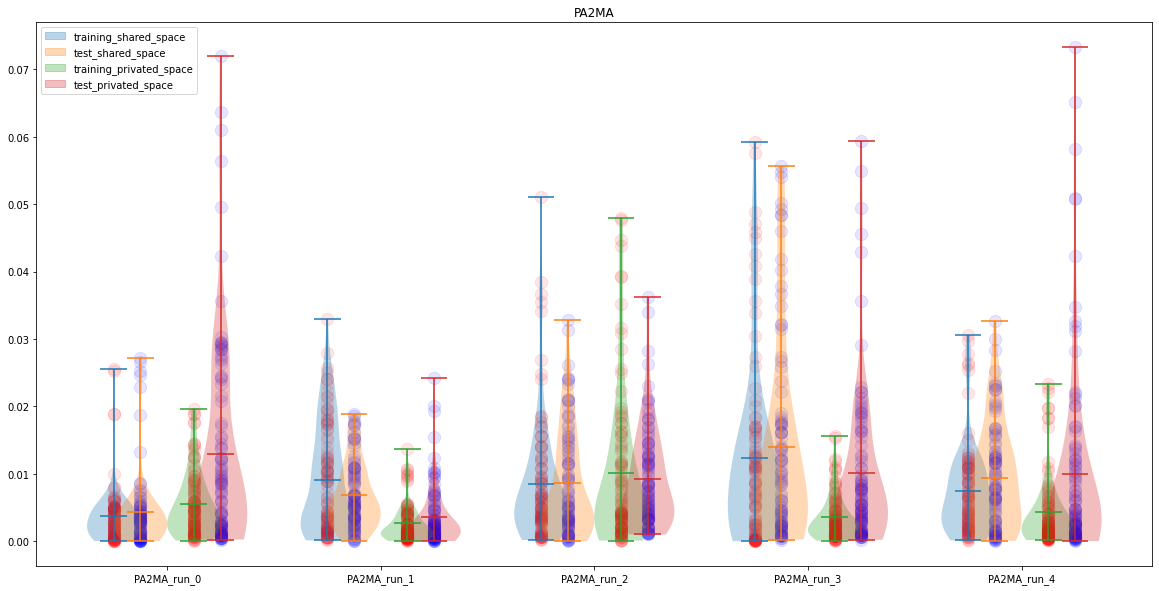

In [13]:
from Distances import KL_divergence,moment_reduction,Moment_based_Multivariate_Normal,batch_normal_reduction
image_mean_red=(lambda P1: tuple(
    map(lambda img:moment_reduction(img,i=2,j=2),batch_normal_reduction(P1))
))

JSD=Jensen_Shanon_divergence(
    Distribution_embedding=image_mean_red,
    Distance_function=Moment_based_Multivariate_Normal,
    Mixture_distribution_method=median_gaussian
)

dists_ex=[]
dists_sh=[]

dist_dic={
    "Train":{},
    "Test":{}
}

base_model="PA2MA"
for data_subset in ["Test","Train"]:
    print(data_subset)
    for run in range(0,5):
        
        model='{}_run_{}'.format(base_model,run)
        print('{}_run_{}'.format(base_model,run))
    
        dist_ex=np.array(JSD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_ex','PA','MA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_ex.append(dist_ex)
        
        dist_sh=np.array(JSD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_sh','PA','MA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_sh.append(dist_sh)
        
        dist_dic[data_subset][model]={
        "shared":dists_sh,
        "privated":dists_ex
    }
        dists_ex=[]
        dists_sh=[]
    

np.save(os.path.join(root,"Latent_space",base_model+"_JSD_general_moment_22_based_reduction"),dist_dic)

#plt.violinplot([dist_dic['Train'][k]["shared"][0] for k in dist_dic['Train'].keys()])
plot_distances(dist_dic)

0 PA2MA_run_0
2 PA2MA_run_1
4 PA2MA_run_2
6 PA2MA_run_3
8 PA2MA_run_4
10 MT2PA_run_0
12 MT2PA_run_1
14 MT2PA_run_2
16 MT2PA_run_3
18 MT2PA_run_4


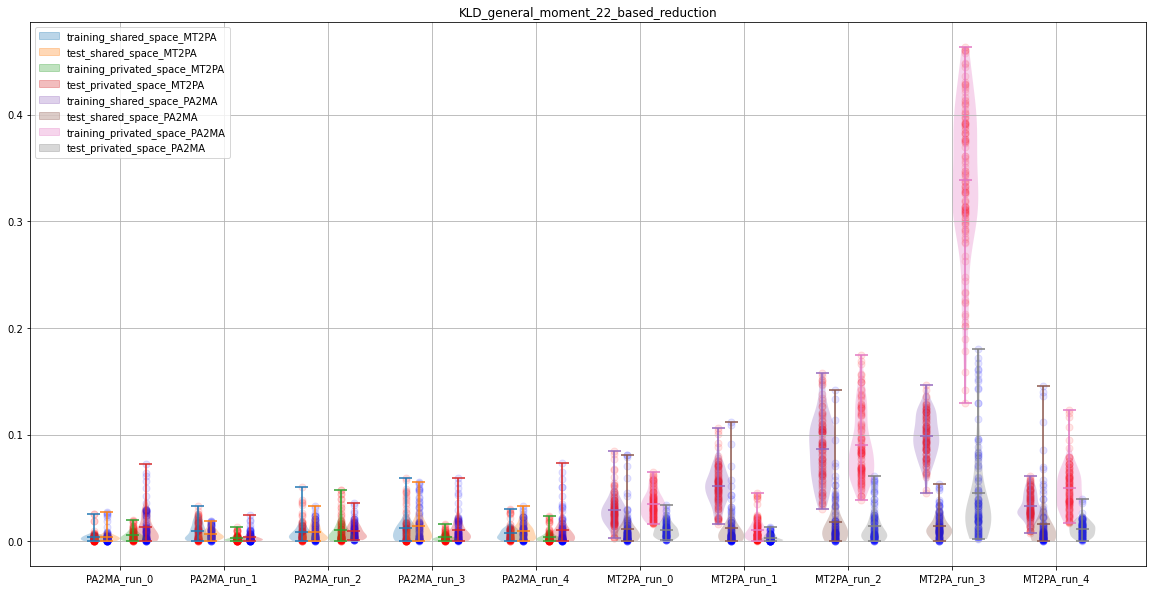

In [21]:
plot_multiple_models([
    np.load(os.path.join(root,"Latent_space","PA2MA"+"_JSD_general_moment_22_based_reduction.npy"),allow_pickle=True).tolist(),
    np.load(os.path.join(root,"Latent_space","MT2PA"+"_JSD_general_moment_22_based_reduction.npy"),allow_pickle=True).tolist()
],
    figure=plt.figure(figsize=(20,10)),
    distance_name="KLD_general_moment_22_based_reduction").savefig("KLD_general_moment_22_based_reduction.png")

In [ ]:
from Distances import KL_divergence,moment_reduction,Moment_based_Multivariate_Normal,batch_normal_reduction
image_mean_red=(lambda P1: tuple(
    map(lambda img:moment_reduction(img,i=3,j=3),batch_normal_reduction(P1))
))
KLD=KL_divergence(Distribution_embedding=image_mean_red,
              Distance_function=Moment_based_Multivariate_Normal
             )

dists_ex=[]
dists_sh=[]

dist_dic={
    "Train":{},
    "Test":{}
}

base_model="MT2PA"
for data_subset in ["Test","Train"]:
    print(data_subset)
    for run in range(0,5):
        
        model='{}_run_{}'.format(base_model,run)
        print('{}_run_{}'.format(base_model,run))
    
        dist_ex=np.array(KLD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_ex','MT','PA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_ex.append(dist_ex)
        

        dist_sh=np.array(KLD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_sh','MT','PA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_sh.append(dist_sh)
        
        dist_dic[data_subset][model]={
        "shared":dists_sh,
        "privated":dists_ex
    }
        dists_ex=[]
        dists_sh=[]
    

np.save(os.path.join(root,"Latent_space",base_model+"_KLD_general_moment_33_based_reduction"),dist_dic)

#plt.violinplot([dist_dic['Train'][k]["shared"][0] for k in dist_dic['Train'].keys()])
plot_distances(dist_dic)

In [ ]:
from Distances import KL_divergence,moment_reduction,Moment_based_Multivariate_Normal,batch_normal_reduction
image_mean_red=(lambda P1: tuple(
    map(lambda img:moment_reduction(img,i=3,j=3),batch_normal_reduction(P1))
))
KLD=KL_divergence(Distribution_embedding=image_mean_red,
              Distance_function=Moment_based_Multivariate_Normal
             )

dists_ex=[]
dists_sh=[]

dist_dic={
    "Train":{},
    "Test":{}
}

base_model="PA2MA"
for data_subset in ["Test","Train"]:
    print(data_subset)
    for run in range(0,5):
        
        model='{}_run_{}'.format(base_model,run)
        print('{}_run_{}'.format(base_model,run))
    
        dist_ex=np.array(KLD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_ex','PA','MA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_ex.append(dist_ex)
        print("private done")
        

        dist_sh=np.array(KLD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_sh','PA','MA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_sh.append(dist_sh)
        print("shared done")
        
        dist_dic[data_subset][model]={
        "shared":dists_sh,
        "privated":dists_ex
    }
        dists_ex=[]
        dists_sh=[]
    

np.save(os.path.join(root,"Latent_space",base_model+"_KLD_general_moment_33_based_reduction"),dist_dic)

#plt.violinplot([dist_dic['Train'][k]["shared"][0] for k in dist_dic['Train'].keys()])
plot_distances(dist_dic)

In [ ]:
plot_multiple_models([
    np.load(os.path.join(root,"Latent_space","PA2MA"+"_KLD_general_moment_33_based_reduction.npy"),allow_pickle=True).tolist(),
    np.load(os.path.join(root,"Latent_space","MT2PA"+"_KLD_general_moment_33_based_reduction.npy"),allow_pickle=True).tolist()
],
    figure=plt.figure(figsize=(20,10)),
    distance_name="KLD_general_moment_33_based_reduction")

MT2PA_run_0
MT2PA_run_1
MT2PA_run_2
MT2PA_run_3
MT2PA_run_4
MT2PA_run_0
MT2PA_run_1
MT2PA_run_2
MT2PA_run_3
MT2PA_run_4
0 MT2PA_run_0
2 MT2PA_run_1
4 MT2PA_run_2
6 MT2PA_run_3
8 MT2PA_run_4


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

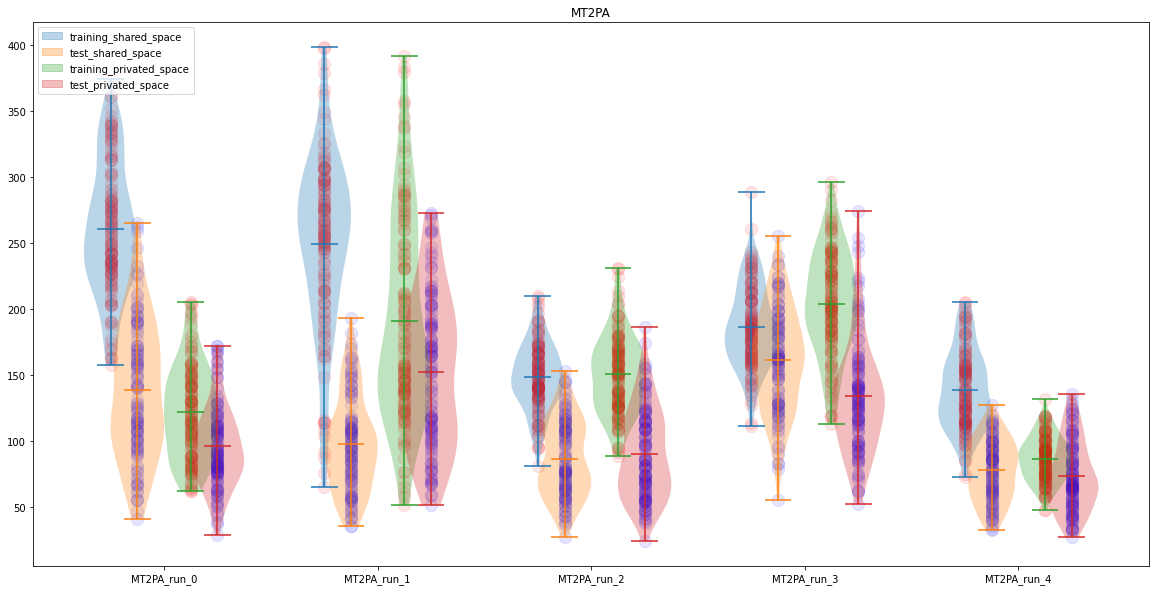

In [10]:
from Distances import KL_divergence,multinomial_dist,Entropy_of_Multinomial_gaussians,batch_normal_reduction,Entropy_of_Multinomial_gaussians_naive
KLD=KL_divergence(Distribution_embedding=multinomial_dist,
              Distance_function=Entropy_of_Multinomial_gaussians_naive
             )

from Distances import KL_divergence,moment_reduction,Moment_based_Multivariate_Normal,batch_normal_reduction
image_mean_red=(lambda P1: tuple(
    map(lambda img:moment_reduction(img,i=1,j=1),batch_normal_reduction(P1))
))

JSD=Jensen_Shanon_divergence(
    Distribution_embedding=multinomial_dist,
    Distance_function=Entropy_of_Multinomial_gaussians_naive,
    Mixture_distribution_method=median_gaussian
)

dists_ex=[]
dists_sh=[]

dist_dic={
    "Train":{},
    "Test":{}
}

base_model="MT2PA"
for data_subset in ["Test","Train"]:
    #print(data_subset)
    for run in range(0,5):
        
        model='{}_run_{}'.format(base_model,run)
        print('{}_run_{}'.format(base_model,run))
    
        dist_ex=np.array(JSD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_ex','MT','PA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_ex.append(dist_ex)
        #print("private done")
        

        dist_sh=np.array(JSD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_sh','MT','PA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_sh.append(dist_sh)
        #print("shared done")
        
        dist_dic[data_subset][model]={
        "shared":dists_sh,
        "privated":dists_ex
    }
        dists_ex=[]
        dists_sh=[]
    

np.save(os.path.join(root,"Latent_space",base_model+"_JSD_multinomial"),dist_dic)

#plt.violinplot([dist_dic['Train'][k]["shared"][0] for k in dist_dic['Train'].keys()])
plot_distances(dist_dic)

Test
PA2MA_run_0
private done
shared done
PA2MA_run_1
private done
shared done
PA2MA_run_2
private done
shared done
PA2MA_run_3
private done
shared done
PA2MA_run_4
private done
shared done
Train
PA2MA_run_0
private done
shared done
PA2MA_run_1
private done
shared done
PA2MA_run_2
private done
shared done
PA2MA_run_3
private done
shared done
PA2MA_run_4
private done
shared done
0 PA2MA_run_0
2 PA2MA_run_1
4 PA2MA_run_2
6 PA2MA_run_3
8 PA2MA_run_4


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

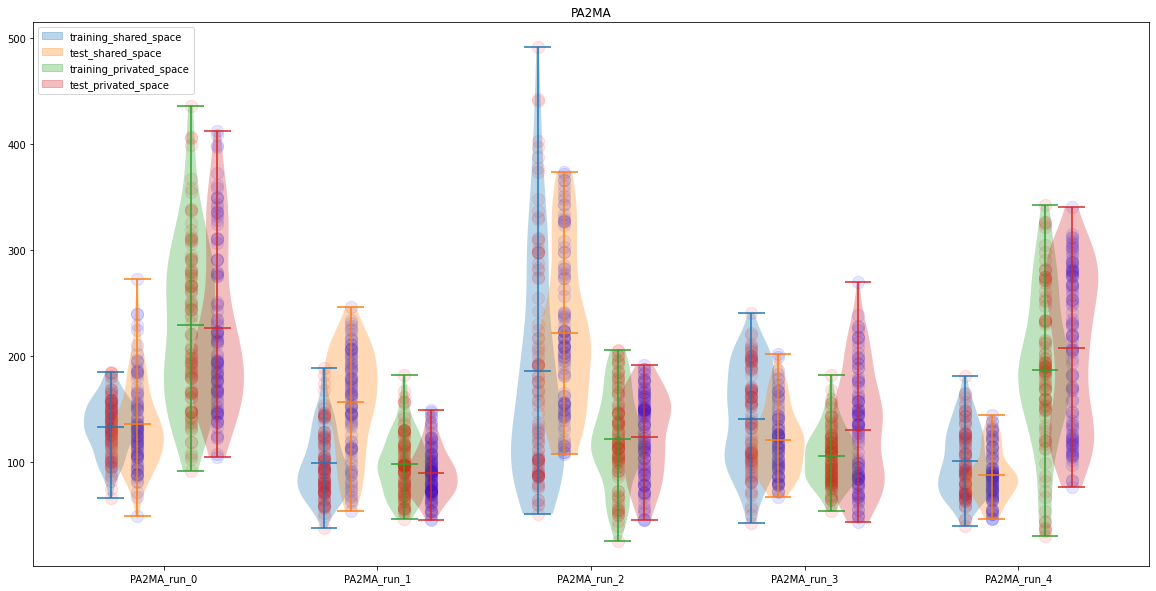

In [11]:
from Distances import KL_divergence,multinomial_dist,Entropy_of_Multinomial_gaussians,batch_normal_reduction,Entropy_of_Multinomial_gaussians_naive
KLD=KL_divergence(Distribution_embedding=multinomial_dist,
              Distance_function=Entropy_of_Multinomial_gaussians_naive
             )

from Distances import KL_divergence,moment_reduction,Moment_based_Multivariate_Normal,batch_normal_reduction
image_mean_red=(lambda P1: tuple(
    map(lambda img:moment_reduction(img,i=1,j=1),batch_normal_reduction(P1))
))

JSD=Jensen_Shanon_divergence(
    Distribution_embedding=multinomial_dist,
    Distance_function=Entropy_of_Multinomial_gaussians_naive,
    Mixture_distribution_method=median_gaussian
)

dists_ex=[]
dists_sh=[]

dist_dic={
    "Train":{},
    "Test":{}
}

base_model="PA2MA"
for data_subset in ["Test","Train"]:
    print(data_subset)
    for run in range(0,5):
        
        model='{}_run_{}'.format(base_model,run)
        print('{}_run_{}'.format(base_model,run))
    
        dist_ex=np.array(JSD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_ex','PA','MA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_ex.append(dist_ex)
        print("private done")
        

        dist_sh=np.array(JSD.compute_batched_distance_from_saved(
        os.path.join(root,"Latent_space",data_subset),'{}_run_{}'.format(base_model,run),'enc_sh','PA','MA',
            sample_strategy='over_sample_smaller',n_samples=4)
                      )
        dists_sh.append(dist_sh)
        print("shared done")
        
        dist_dic[data_subset][model]={
        "shared":dists_sh,
        "privated":dists_ex
    }
        dists_ex=[]
        dists_sh=[]
    

np.save(os.path.join(root,"Latent_space",base_model+"_JSD_multinomial"),dist_dic)

#plt.violinplot([dist_dic['Train'][k]["shared"][0] for k in dist_dic['Train'].keys()])
plot_distances(dist_dic)

0 PA2MA_run_0
2 PA2MA_run_1
4 PA2MA_run_2
6 PA2MA_run_3
8 PA2MA_run_4
10 MT2PA_run_0
12 MT2PA_run_1
14 MT2PA_run_2
16 MT2PA_run_3
18 MT2PA_run_4


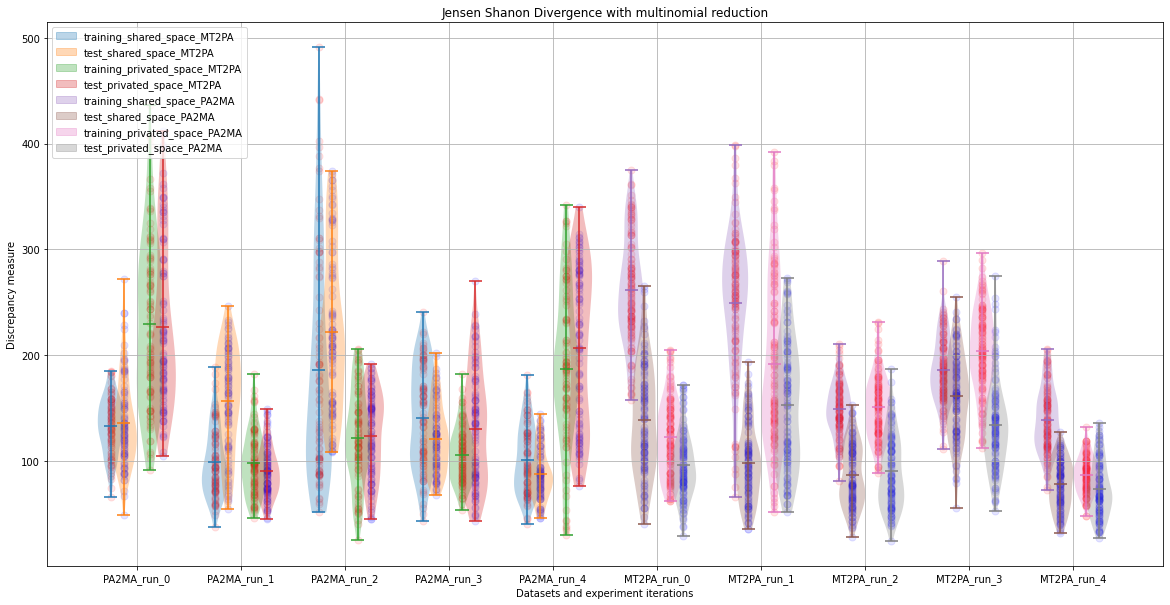

In [5]:
plot_multiple_models([
    np.load(os.path.join(root,"Latent_space","PA2MA"+"_JSD_multinomial.npy"),allow_pickle=True).tolist(),
    np.load(os.path.join(root,"Latent_space","MT2PA"+"_JSD_multinomial.npy"),allow_pickle=True).tolist()
],
    figure=plt.figure(figsize=(20,10)),
    distance_name="Jensen Shanon Divergence with multinomial reduction").savefig("JSD_multinomial.png")